In [5]:
!pip install pandas scikit-learn


In [6]:
!pip install matplotlib 

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 495.5 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.9 kB 751.6 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.9 kB 798.9 kB/s eta 0:00:01
     -----------------------------------  163.8/165.9 kB 756.6 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 710.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 1.3 MB/s eta 0:00:07
    --------------------------------------- 0.1/8.0 MB 1.3 MB/s eta 0:00:06
    --------------------------------------- 0.2/8.0 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.2/8.0 MB 1.2 MB/s eta 0:00:07
   - --

In [7]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 245.8 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 328.2 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 787.7 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.0 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [9]:
data = pd.read_csv('flights.csv')
data.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13228\1742521699.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


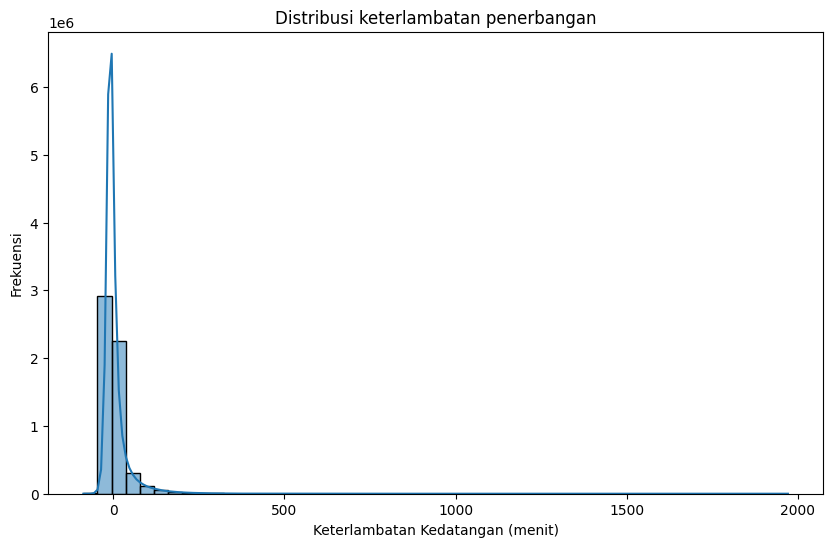

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ARRIVAL_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribusi keterlambatan penerbangan')
plt.xlabel('Keterlambatan Kedatangan (menit)')
plt.ylabel('Frekuensi')
plt.show()

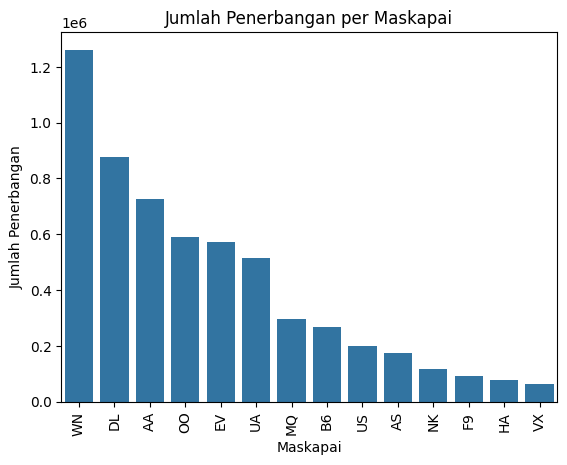

In [16]:
sns.countplot(data=data, x='AIRLINE', order=data['AIRLINE'].value_counts().index)
plt.title('Jumlah Penerbangan per Maskapai')
plt.xlabel('Maskapai')
plt.ylabel('Jumlah Penerbangan')
plt.xticks(rotation=90)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13228\3701624054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_counts.index, y=delay_counts.values, palette='viridis')


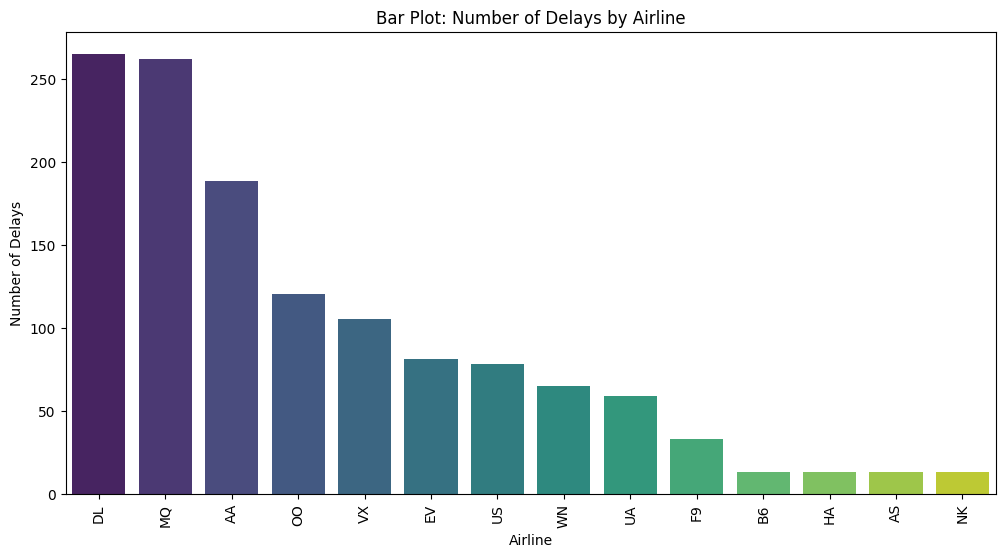

In [21]:
delay_counts = data[data['WEATHER_DELAY'] == 1]['AIRLINE'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_counts.index, y=delay_counts.values, palette='viridis')
plt.title('Bar Plot: Number of Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Delays')
plt.xticks(rotation=90)
plt.show()


In [22]:
numeric_features = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 
                    'SCHEDULED_DEPARTURE', 'DISTANCE', 'SCHEDULED_ARRIVAL']
categorical_features = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

In [23]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [24]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [26]:
data['AIRLINE'] = data['AIRLINE'].astype(str)
data['ORIGIN_AIRPORT'] = data['ORIGIN_AIRPORT'].astype(str)
data['DESTINATION_AIRPORT'] = data['DESTINATION_AIRPORT'].astype(str)

In [27]:
data['DELAYED'] = data['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)
features = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
            'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 
            'DISTANCE', 'SCHEDULED_ARRIVAL']
target = 'DELAYED'

X = data[features]
y = data[target]


In [28]:
x = data.drop(columns='ARRIVAL_DELAY', axis=1)
y = data['DELAYED'] = data['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)

In [29]:
print(x)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0  

In [30]:
print(y)

0          0
1          0
2          1
3          0
4          0
          ..
5819074    0
5819075    0
5819076    0
5819077    0
5819078    1
Name: ARRIVAL_DELAY, Length: 5819079, dtype: int64


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

In [39]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YEAR', 'MONTH', 'DAY',
                                                   'DAY_OF_WEEK',
                                                   'FLIGHT_NUMBER',
                                                   'SCHEDULED_DEPARTURE',
                                                   'DISTANCE',
                                                   'SCHEDULED_ARRIVAL']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['AIRLINE', 'ORIGIN_AIRPORT',
                                                   'DESTINATION_AIRPORT'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [40]:
y_pred = model.predict(X_test)

In [41]:
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.6429358249070299


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77    746293
           1       0.51      0.09      0.15    417523

    accuracy                           0.64   1163816
   macro avg       0.58      0.52      0.46   1163816
weighted avg       0.60      0.64      0.55   1163816



In [ ]:
input_data = (2024, 7, 15, 2, 'AA', 1234, 'JFK', 'LAX', 1000, 300, 1500)  
input_data_df = pd.DataFrame([input_data], columns=features)

prediction = model.predict(input_data_df)

print("Hasil Prediksi:", prediction[0])
if prediction[0] == 0:
    print('Penerbangan tidak terlambat / delay')
else:
    print('Penerbangan terlambat/delay')

Hasil Prediksi: 0
Penerbangan tidak terlambat


In [37]:
predictions_df = pd.DataFrame({
    'SCHEDULED_DEPARTURE': X_test['SCHEDULED_DEPARTURE'],
    'DISTANCE': X_test['DISTANCE'],
    'SCHEDULED_ARRIVAL': X_test['SCHEDULED_ARRIVAL'],
    'Prediksi_Keterlambatan': y_pred
})

print(predictions_df.head())

         SCHEDULED_DEPARTURE  DISTANCE  SCHEDULED_ARRIVAL  \
1508570                 1340       128               1436   
363270                  1910       867               2145   
3003945                  630       672                820   
2291425                  810       546                950   
2973084                 1000      3904               1318   

         Prediksi_Keterlambatan  
1508570                       0  
363270                        0  
3003945                       0  
2291425                       0  
2973084                       0  


In [44]:
import pickle

In [45]:
filename = 'prediksi_delayFlight.sav'
pickle.dump(model, open(filename, 'wb'))